In [27]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [28]:
accuracies = []

def predict(year):
    df_past_1 = pd.read_csv(f'./match_data_yearly/{year-1}.csv')
    df_past_2 = pd.read_csv(f'./match_data_yearly/{year-2}.csv')
    df_past_3 = pd.read_csv(f'./match_data_yearly/{year-3}.csv')
    
    df_past = pd.concat([df_past_3,df_past_2,df_past_1])    
    X_train = df_past[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_train = df_past["W/L"].values
    
    df_future = pd.read_csv(f'./match_data_yearly/{year}.csv')
    X_test = df_future[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_test = df_future["W/L"].values
    
    rf= RandomForestClassifier(max_depth=5)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    
    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy)
        

In [30]:
for _ in range(10):
    for y in (2013,2014,2015,2016,2017,2018,2019,2020):
        predict(y)

In [31]:
accuracies

[0.6568627450980392,
 0.6241830065359477,
 0.5947712418300654,
 0.6666666666666666,
 0.6601307189542484,
 0.6176470588235294,
 0.6339869281045751,
 0.5816993464052288,
 0.6699346405228758,
 0.6143790849673203,
 0.5980392156862745,
 0.6535947712418301,
 0.6437908496732027,
 0.6143790849673203,
 0.6405228758169934,
 0.5816993464052288,
 0.6568627450980392,
 0.6176470588235294,
 0.6013071895424836,
 0.6601307189542484,
 0.6633986928104575,
 0.6241830065359477,
 0.6372549019607843,
 0.6045751633986928,
 0.6633986928104575,
 0.6274509803921569,
 0.6241830065359477,
 0.6633986928104575,
 0.6535947712418301,
 0.6143790849673203,
 0.6568627450980392,
 0.5980392156862745,
 0.6601307189542484,
 0.6176470588235294,
 0.6111111111111112,
 0.6666666666666666,
 0.6601307189542484,
 0.6209150326797386,
 0.6339869281045751,
 0.6045751633986928,
 0.673202614379085,
 0.6437908496732027,
 0.6078431372549019,
 0.673202614379085,
 0.6503267973856209,
 0.6143790849673203,
 0.6437908496732027,
 0.620915032679

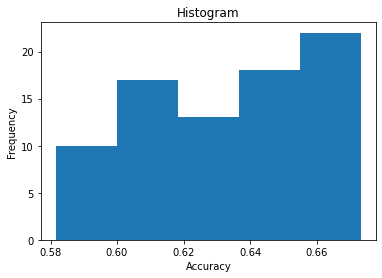

In [33]:
n, bins, patches=plt.hist(accuracies, bins=5)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [34]:
np.mean(accuracies)

0.633578431372549

### 考察

2013-2020を予測するシーズンとし､そのシーズンの過去3年間を訓練データとした｡
試合時のEloratingと前月との差分を入力データに使い､勝敗予測の精度を出したところ､2013-2020でおよそ60%台前半にぐらいになる